# Indian Startup Funding Analysis (Data Cleaning Phase)
In this notebook, I will clean the data I got from Kaggle. I will focus on data quality assessment, detecting available problems in this dataset (such as: Incompleteness, Inaccuracy, Invalidity, Conformaty), as well as having methods to deal with them.

### Where the data from.
Kaggle link: https://www.kaggle.com/datasets/sudalairajkumar/indian-startup-funding

### Purpose of the data
We will gain knowledge about funding investment market in India (from January 2015 to August 2017) and see whether India is a great opportunity for startup to grow.

### Structure of data
<ol>
    <li> Sr No: serial number.</li>
    <li> Date dd/mm/yyyy : Date of funding (in dd/mm/yyyy format)</li>
    <li>Startup Name: Name of the startup</li>
    <li>Industry Vertical:  Industry vertical of the startup</li>
    <li>SupVertical: Industry sub-vertical</li>
    <li>City Location:  city of location</li>
    <li>Investors Nam: Name of the investors</li>
    <li>InvestmentnType: Type of investment</li>
    <li>Amount in USD:  Funding amount in USD</li>
    <li># Remarks: other remarks if any </li> 
</ol>

# Import Data

In [80]:
import pandas as pd 
import numpy as np

In [58]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\dateset\startup_funding.csv')
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


## OVERVIEW CHECK

### 1. Understand Data Information (column names, number of recoreds, memory usage)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


### 2. NaN Values (how many, where are they)

In [193]:
print('Percentage of Incompleness:', round(data.isnull().sum().sum()*100/len(data),2),'%')

Percentage of Incompleness: 75.33 %


<AxesSubplot:>

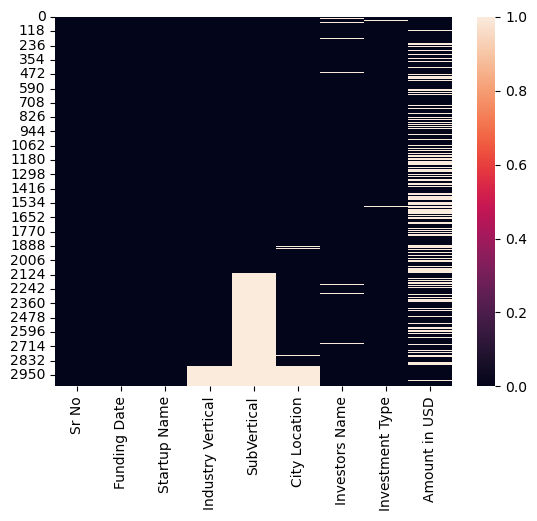

In [194]:
import seaborn as sns
sns.heatmap(data.isnull())

### 3. Remove Unnecessary Columns

In [60]:
#Col Remarks has all NaN values:
data = data.drop(columns = 'Remarks')
data.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"


### 4. Change Column Names

In [62]:
data = data.rename(columns={'Date dd/mm/yyyy': 'Funding Date'})
data = data.rename(columns={'InvestmentnType': 'Investment Type'})

# Detail Check

### 1. Series Number Column

In [63]:
data['Sr No'].duplicated().any()
# No Redundancy Problem in Primary Key Column

False

### 2. Funding Date Column

Incompleness Problem

In [64]:
data['Funding Date'].isnull().any()

False

Conformaty Problem

In [65]:
#Detect Invalid Date Value
invalid_values = data[pd.to_datetime(data['Funding Date'], format='%d/%m/%Y', errors='coerce').isna()]
invalid_values

,Sr No,Funding Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
192,193,05/072018,Loan Tap,Consumer Internet,Online Lending Platform For Salaried Professio...,Mumbai,"Shunwei Capital, Tuscan Ventures, Ashish Goenk...",Private Equity,"62,50,000"
2571,2572,01/07/015,HandyHome,Hyperlocal Electronics repair Service,NaN,Mumbai,"Bessemer Ventures, Kae Capital",Seed Funding,"6,30,000"
2606,2607,\\xc2\\xa010/7/2015,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000"
2775,2776,12/05.2015,Mobiefit,Mobile Fitness App,NaN,Goa,Prototyze,Seed Funding,NaN
2776,2777,12/05.2015,Plancess,Online Education Platform,NaN,Mumbai,"Rajendra Gogri,\\xc2\\xa0 Chandrakant Gogri",Seed Funding,"20,00,000"
2831,2832,13/04.2015,The Porter,Logistics Tech,NaN,Mumbai,Kae Capital,Seed Funding,"5,00,000"
3011,3012,15/01.2015,Wishberry,NaN,NaN,NaN,"Rajan Anandan, Shankar Mahadevan, Deep Kalra &...",Seed Funding,"6,50,000"
3029,3030,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"2,00,000"


In [66]:
print('#of conformaty problem is:', len(invalid_values),'rows')

#of conformaty problem is: 8 rows


In [67]:
#Replace to valid fomatted values
data.loc[192,'Funding Date'] = '05/07/2018'
data.loc[2571,'Funding Date'] = '01/07/2015'
data.loc[3029,'Funding Date'] = '22/01/2015'
data.loc[2606,'Funding Date'] = '10/07/2015'

In [68]:
#Change data type 
data['Funding Date'] = pd.to_datetime(data['Funding Date'], dayfirst=True, errors='coerce')
data.head()

,Sr No,Funding Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


### 3. Startup Name

Incompleteness Problem

In [69]:
data['Startup Name'].isnull().any()

False

In [72]:
#Supposed that any rows having 'www' are invalid values, since they're links
data[data['Startup Name'].str.contains('www')]

,Sr No,Funding Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"


In [73]:
#Replace value
data.loc[3,'Startup Name'] = 'Wealth Bucket'

### 4.Industry Vertical Column

In [78]:
print('#of Incompeteness Problem:', len(data['Industry Vertical'].isnull()), 'rows')

#of Incompeteness Problem: 3044 rows


### 5. SubVertical Column

In [92]:
print('#of Incompeteness Problem:', len(data['SubVertical'].isnull()), 'rows')

#of Incompeteness Problem: 3044 rows


### 6. City Location Column

In [97]:
# I realized there're 2 tabs (2 spaces) among City Location name by this function:
data.columns
## I'll change it:
data = data.rename(columns={'City  Location': 'City Location'})

In [99]:
print('#of Incompeteness Problem:', len(data['City Location'].isnull()), 'rows')

#of Incompeteness Problem: 3044 rows


### 7. Investors Name

In [112]:
print('#of Incompeteness Problem:', len(data['Investors Name'].isnull()), 'rows')

#of Incompeteness Problem: 3044 rows


### 8. Investment Type Column

In [115]:
print('#of Incompeteness Problem:', len(data['Investors Name'].isnull()), 'rows')

#of Incompeteness Problem: 3044 rows


### 9. Amount in USD

In [140]:
#Removed unpropriate characters in money values
data['Amount in USD'] = data['Amount in USD'].replace('\W','', regex=True)

Incompleteness Problem

In [146]:
print('#of ivalid amount:', len(invalid_amount), 'rows')

#of ivalid amount: 978 rows


In [191]:
print('Percentage of Incompleness:', round(data.isnull().sum().sum()*100/len(data),2),'%')

Percentage of Incompleness: 75.33 %


In [196]:
#export data
data.to_csv('startup_fund_cleaned.csv')

In [199]:
import os
os.getcwd()

'C:\\Users\\Admin'